In [6]:
import pandas as pd
import colorama as col

import matplotlib.pyplot as plt

df = pd.read_csv("./Test Report.csv")

In [7]:
def print_red(s):
    print(col.Fore.RED + s + col.Fore.RESET)

def print_green(s):
    print(col.Fore.GREEN + s + col.Fore.RESET)
    

In [8]:
def check_tests_status():
    number_of_tests = df.shape[0]
    number_of_tests_passed = df['Status'].value_counts()['Yes']

    if 'No' not in df['Status'].value_counts():
        number_of_tests_failed = 0
    else:
        number_of_tests_failed = df['Status'].value_counts()['No']

    if number_of_tests_passed + number_of_tests_failed != number_of_tests:
        print_red("Error: Number of tests passed and failed does not equal total number of tests")
    else:
        print("Number of tests: ", number_of_tests)
        print_green("Tests passing: " + str(number_of_tests_passed))
        print_red("Tests failing: " + str(number_of_tests_failed))

check_tests_status()

Number of tests:  33
Tests passing: 28
Tests failing: 5


In [9]:
# Priority list of failed tests based on importance level

def list_failed_tests_priority():
    failed_tests = df[df['Status'] == 'No']
    failed_tests = failed_tests.sort_values(by=['Severity'])
    failed_tests = failed_tests.iloc[::-1]
    if failed_tests.empty:
        print_green("No failed tests")
    else:
        for index, row in failed_tests.iterrows():
            print("number: ", row['Bug ID'])
            print("Importance level: ", row['Severity'])
            print("Type of issue: ", row['Bug Description'])
            print("Steps to reproduce: ", row['Steps to reproduce'])
            print("Actual result: ", row['Actual result'])
            print("Expected result: ", row['Expected result'])
            print("How to fix: ", row['How to fix(if known)'])
            print("")

list_failed_tests_priority()

number:  27
Importance level:  3
Type of issue:  Grappling hook not precise
Steps to reproduce:  1. Start a level with a grappler 2. Take over the grappler 3. Use the grappling hook on an aerial surface 4. Try to use it on another aerial surface 5. You can grab the opposite way
Actual result:  The grappling hook can sometimes be not precise and will not attach to the right surface
Expected result:  The grappling hook needs to shoot where the player is aiming
How to fix:  Change the detection system of the grappling hook

number:  33
Importance level:  2
Type of issue:  Laser collider issue
Steps to reproduce:  1. Start the level 4 2. Go to the first checkpoint 3. Jump on a laser as a worm
Actual result:  You are not killed by the laser
Expected result:  The laser should kill the player
How to fix:  Change the collider or the laser

number:  32
Importance level:  2
Type of issue:  Slingshot collider issue
Steps to reproduce:  1. Start a level with a slingshot and with black and white bo

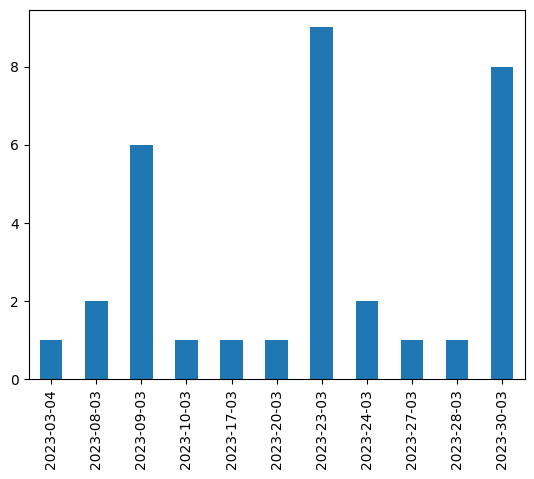

In [11]:
# Graph of all the dates 

def graph_dates():
    dates = df['Date of discovery'].value_counts()
    dates = dates.sort_index()
    dates.plot(kind='bar')
    plt.show()

graph_dates()